In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2025-04-01')

[*********************100%***********************]  1 of 1 completed


In [26]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440330,6.455076,6.391278,6.422876,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348848,6.477047,6.342228,6.451467,552160000
2010-01-07,6.337111,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800
...,...,...,...,...,...
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100


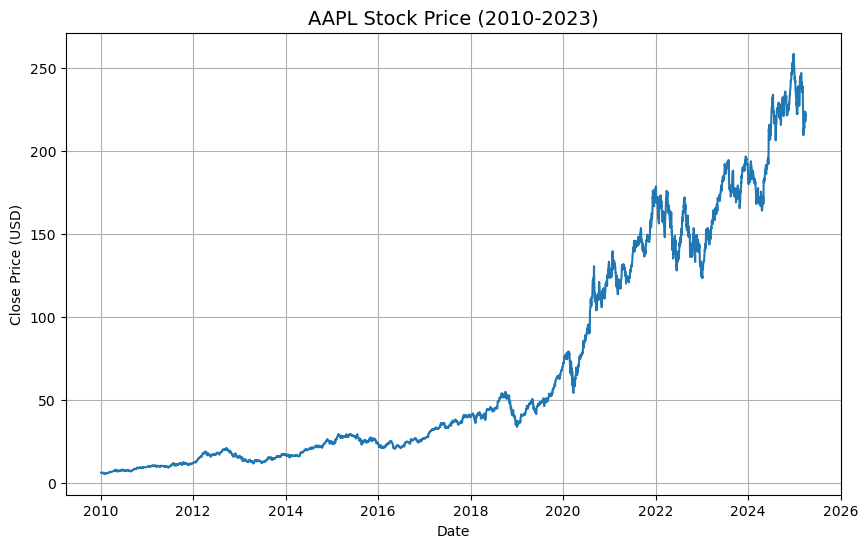

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'])
plt.title(f'{ticker} Stock Price (2010-2023)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

adf_test(stock_data['Close'])

ADF Statistic: 0.7892312802285755
p-value: 0.9914603370675499


### Make data stationary

In [33]:
stock_data['Close_diff'] = stock_data['Close'].diff().dropna()

adf_test(stock_data['Close_diff'].dropna())

ADF Statistic: -15.211651113382148
p-value: 5.643641638120429e-28


In [35]:
from pmdarima import auto_arima

# Fit ARIMA model
model = auto_arima(stock_data['Close'], seasonal=False, stepwise=True, trace=True)

# Summary of the model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14740.081, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14741.870, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14741.868, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14742.514, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14743.869, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 9.655 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3834
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7368.041
Date:                Sun, 13 Apr 2025   AIC                          14740.081
Time:                        22:15:19   BIC                          14752.584
Sample:                             0   HQIC                         14744.523
          

C:\Users\ajith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ajith\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


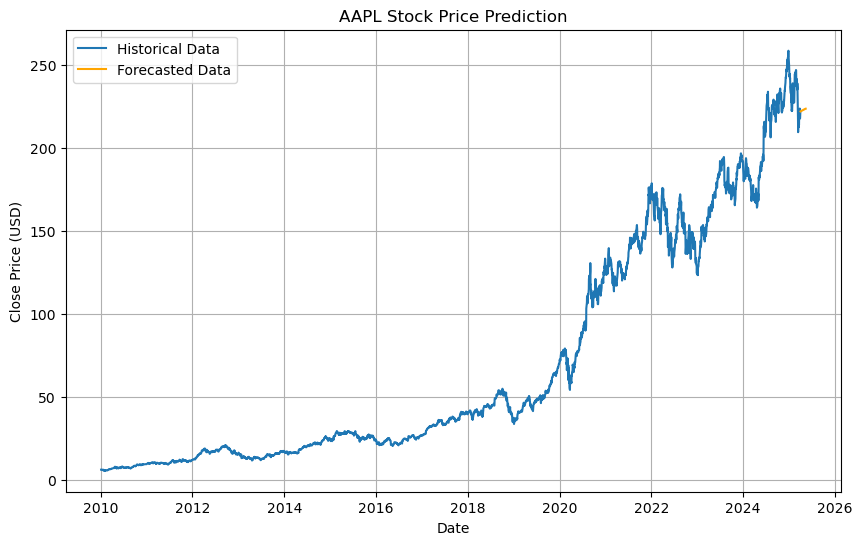

In [47]:
# Predict the next 30 days
forecast = model.predict(n_periods=30)

# Create a date range for the future predictions
forecast_index = pd.date_range(start=stock_data.index[-1], periods=31, freq='B')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecasted Data', color='orange')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
